# Capstone Project - The Battle of London Neighborhoods 

## Topic: Finding the best place to build a student hall in London

### Date: 21 May 2020
### Author: René Alexander Albrecht

#### 1. Description of the Problem

London is a popular destination for higher education where diverse students from all around the world gather to study.

According to the data published by the Higher Education Statistical Agency (HESA), in the academic year 2016-2017 London welcomed 112,200 international students to its higher education institutions, which make up 29 percent of students at higher education institutions.

One of the big concerns for international students when moving to a new city would be finding an accommodation. Student halls are the most reliable means of housing for students, but it is not easy to secure a place in one as they are in high demand. Therefore in this project, I intend to **explore different neighborhoods of London and find the best area to build a new student hall for international students in London** to solve this persistent problem and to find a new business opportunity.This research is expected to benefit real-estate investors looking for a profitable location or international students looking for a place to live in London.      

From the student perspective, a lot of factors come into play when finding the best accommodation, including location and rent. Howerver, this study will focus only on **the safety and the general atmosphere of the neighborhood.** Distance to universities are also an important factor in choosing a student hall, but as student halls accept students from different universities, it will be disregarded in this project.   

#### 2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - London Recorded Crime, List of London Boroughs, and Foursquare API.   
Let's have a look at them.

**a. London Recorded Crime : Geographic Breakdown**   
* London crime records by boroughs in the last 24 months   
* source: London Datastore   
* url: https://data.london.gov.uk/dataset/recorded_crime_summary

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Read crime records data
crime = pd.read_csv("MPS Borough Level Crime (most recent 24 months).csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201805,201806,201807,201808,201809,201810,201811,...,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004
0,Arson and Criminal Damage,Arson,Barking and Dagenham,4,12,6,5,3,8,5,...,5,3,6,9,8,6,4,5,6,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,126,123,127,101,107,132,105,...,134,118,109,109,97,121,97,103,108,82
2,Burglary,Burglary - Business and Community,Barking and Dagenham,24,33,30,18,33,32,39,...,31,35,37,30,30,25,31,17,27,29
3,Burglary,Burglary - Residential,Barking and Dagenham,93,77,94,84,99,94,106,...,71,67,80,97,114,130,116,123,97,56
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,6,8,7,10,7,7,...,11,7,7,10,12,3,11,3,6,9


In [4]:
# Dimension of Data
crime.shape

(1567, 27)

In [6]:
# Names of Boroughs
crime['LookUp_BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [7]:
# Create a column for sum of incidents in 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201805,201806,201807,201808,201809,201810,...,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004
0,Arson and Criminal Damage,Arson,Barking and Dagenham,129,4,12,6,5,3,8,...,5,3,6,9,8,6,4,5,6,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2731,126,123,127,101,107,132,...,134,118,109,109,97,121,97,103,108,82
2,Burglary,Burglary - Business and Community,Barking and Dagenham,708,24,33,30,18,33,32,...,31,35,37,30,30,25,31,17,27,29
3,Burglary,Burglary - Residential,Barking and Dagenham,2388,93,77,94,84,99,94,...,71,67,80,97,114,130,116,123,97,56
4,Drug Offences,Drug Trafficking,Barking and Dagenham,169,8,6,8,7,10,7,...,11,7,7,10,12,3,11,3,6,9


In [8]:
# Delete unnecessary columns
crime.drop(crime.columns[0:2], axis=1, inplace=True)
crime.drop(crime.columns[2:26], axis=1, inplace=True)
crime.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,129
1,Barking and Dagenham,2731
2,Barking and Dagenham,708
3,Barking and Dagenham,2388
4,Barking and Dagenham,169


In [10]:
# Calculate sum of incidents in the last 24 months by boroughs
crime = crime.groupby(['LookUp_BoroughName'], as_index=False).sum()
crime.head()

,LookUp_BoroughName,Sum
0,Barking and Dagenham,38786
1,Barnet,59877
2,Bexley,33907
3,Brent,60584
4,Bromley,48235


In [11]:
# Change the sum into monthly average
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime.head()

,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.083333
1,Barnet,2494.875000
2,Bexley,1412.791667
3,Brent,2524.333333
4,Bromley,2009.791667


In [12]:
# Explore the clean dataset - borough with most incidents?
crime.sort_values(by='MonthlyAverage', ascending=False).head()

,LookUp_BoroughName,MonthlyAverage
32,Westminster,6126.875000
27,Southwark,3122.083333
5,Camden,3117.750000
24,Newham,2973.875000
20,Lambeth,2920.541667


In [13]:
### Explore the clean dataset - borough with least incidents?
crime.sort_values(by='MonthlyAverage', ascending=True).head()

,LookUp_BoroughName,MonthlyAverage
22,London Heathrow and London City Airports,281.750000
19,Kingston upon Thames,1061.375000
26,Richmond upon Thames,1064.000000
28,Sutton,1115.375000
23,Merton,1179.666667


**b. List of London Boroughs**   
* Information on boroughs and their population & coordinates   
 -Population can be used to calcuate the ratio of reported crime to population for better comparison.   
 -Coordinates can be used to get neighborhood data from Foursquare.   
* source: Wikipedia   
* url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [16]:
#!pip install bs4
!pip install lxml
import requests
import lxml
from bs4 import BeautifulSoup

     |████████████████████████████████| 5.5MB 10.3MB/s eta 0:00:01     |██████████████████████████      | 4.5MB 10.3MB/s eta 0:00:01     |███████████████████████████████ | 5.4MB 10.3MB/s eta 0:00:01


In [17]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XsPxmwpAMNQAAq-MrpgAAACL","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":956732369,"wgRevisionId":956732369,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinate lists","Ar

In [18]:
BoroughName = []
Population = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[0].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [19]:
# Form a dataframe
dict = {'BoroughName' : BoroughName,
       'Population' : Population,
       'Coordinates': Coordinates}
info = pd.DataFrame.from_dict(dict)
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [20]:
# Strip unwanted texts
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(']'))
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip('1234567890.'))
info['BoroughName'] = info['BoroughName'].str.replace('note','')
info['BoroughName'] = info['BoroughName'].map(lambda x: x.rstrip(' ['))
info.head()

,BoroughName,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [21]:
# Clean coordinates
info[['Coordinates1','Coordinates2','Coordinates3']] = info['Coordinates'].str.split('/',expand=True)
info.head()

,BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [22]:
info.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
info[['Latitude','Longitude']] = info['Coordinates3'].str.split(';',expand=True)
info.head()

,BoroughName,Population,Coordinates3,Latitude,Longitude
0,Barking and Dagenham,"194,352",51.5607; 0.1557﻿ (Barking and Dagenham),51.5607,0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51.6252; -0.1517﻿ (Barnet),51.6252,-0.1517﻿ (Barnet)
2,Bexley,"236,687",51.4549; 0.1505﻿ (Bexley),51.4549,0.1505﻿ (Bexley)
3,Brent,"317,264",51.5588; -0.2817﻿ (Brent),51.5588,-0.2817﻿ (Brent)
4,Bromley,"317,899",51.4039; 0.0198﻿ (Bromley),51.4039,0.0198﻿ (Bromley)


In [23]:
info.drop(labels=['Coordinates3'], axis=1,inplace = True)
info['Latitude'] = info['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Latitude'] = info['Latitude'].map(lambda x: x.lstrip())
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(')'))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(' ('))
info['Longitude'] = info['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
info['Longitude'] = info['Longitude'].map(lambda x: x.lstrip())
info['Population'] = info['Population'].str.replace(',','')
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [24]:
info['BoroughName'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

**c. Foursquare API**   
* List of top 50 popular places in the neighborhood
* source: Foursquare
* url: https://api.foursquare.com

In [26]:
# Foursquare credentials
CLIENT_ID = 'SVL5BQ4HE0M3ZWDV4AWUHVIVYXEZXPAISFWLM0DUWN1IF1CW' # your Foursquare ID
CLIENT_SECRET = 'ZQ4HI30TT2IAX2XDNRN5JV4UFR1U4GIAIVFEZ4AZ5OUQVGBE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: SVL5BQ4HE0M3ZWDV4AWUHVIVYXEZXPAISFWLM0DUWN1IF1CW
CLIENT_SECRET:ZQ4HI30TT2IAX2XDNRN5JV4UFR1U4GIAIVFEZ4AZ5OUQVGBE


NameError: name 'CLIENT_ID' is not defined

In [27]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
#Get top 50 venues in 500m radius of the center of each Borough
LIMIT = 50
venues = getNearbyVenues(names=info['BoroughName'],
                                   latitudes=info['Latitude'],
                                   longitudes=info['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [33]:
print(venues.shape)
venues.head()

(1136, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


#### 3. Methodology
In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

**a. Exploratory Analysis**

In [34]:
#Review our data
crime.head()

,LookUp_BoroughName,MonthlyAverage
0,Barking and Dagenham,1616.083333
1,Barnet,2494.875000
2,Bexley,1412.791667
3,Brent,2524.333333
4,Bromley,2009.791667


In [35]:
info.head()

,BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [36]:
venues.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


In [37]:
import matplotlib.pyplot as plt

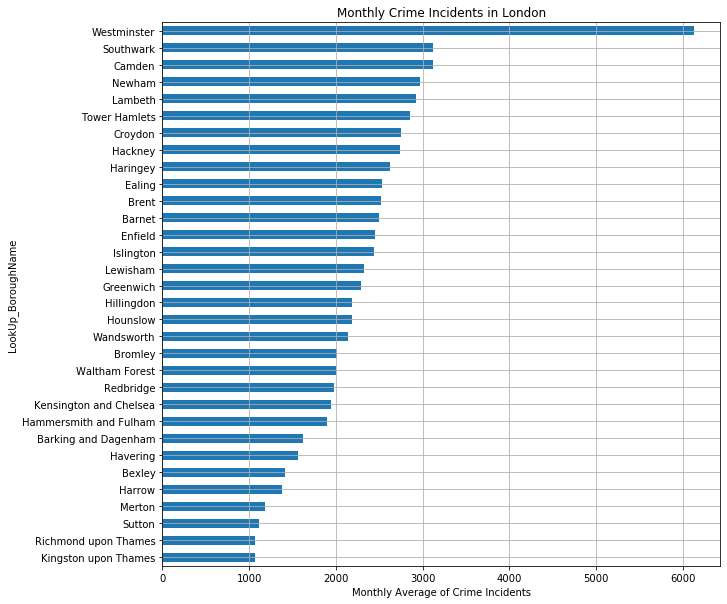

In [42]:
#Visualize crime data
crime.set_index('LookUp_BoroughName')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

Westminster has the biggest number of reported crime, followed by Camden, Newham and Southwark.

In [43]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
crime.drop([22], inplace=True)

KeyError: '[22] not found in axis'

In [44]:
crime.rename(columns={'LookUp_BoroughName' : 'BoroughName' }, inplace = True)

In [45]:
#Combine crime data and borough information data
df = pd.merge(crime,info, how='outer', on='BoroughName')
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1616.083333,194352,51.5607,0.1557
1,Barnet,2494.875000,369088,51.6252,-0.1517
2,Bexley,1412.791667,236687,51.4549,0.1505
3,Brent,2524.333333,317264,51.5588,-0.2817
4,Bromley,2009.791667,317899,51.4039,0.0198


In [46]:
#Check data type
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [47]:
df['Population'] = pd.to_numeric(df['Population'])
df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])
df.dtypes

BoroughName        object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [48]:
df.shape

(32, 5)

In [49]:
#Create a column that shows the number of crimes per 1000 people per month
df['Population'].astype(float)
df['CrimeToPop'] = df['MonthlyAverage'] / df['Population'] * 1000
df.head()

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1616.083333,194352,51.5607,0.1557,8.315239
1,Barnet,2494.875000,369088,51.6252,-0.1517,6.759567
2,Bexley,1412.791667,236687,51.4549,0.1505,5.969029
3,Brent,2524.333333,317264,51.5588,-0.2817,7.956570
4,Bromley,2009.791667,317899,51.4039,0.0198,6.322108


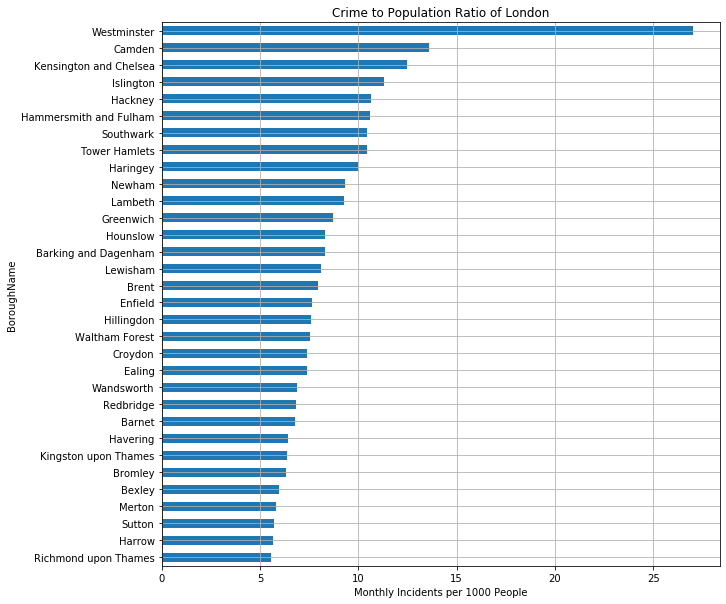

In [50]:
#Visualize crime per 1000 people
df.set_index('BoroughName')['CrimeToPop'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [52]:

!pip install geopy
import folium
from geopy.geocoders import Nominatim

     |████████████████████████████████| 122kB 25.7MB/s eta 0:00:01


In [53]:
#Get coordinates of London
address = 'London, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [54]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df['Latitude'], df['Longitude'], df['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

We can see that Westminster and Camden still remains top 2 dangerous area even after taking population into consideration.

**b. Cluster Analysis**   
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [55]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 182 uniques categories.


In [56]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [57]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
onehot.shape

(1136, 183)

In [59]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
1,Barnet,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
2,Bexley,0.000,0.000000,0.000000,0.000000,0.033333,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.033333,0.000000,0.033333,0.00,0.000000,0.00,0.00,0.000000
3,Brent,0.000,0.000000,0.000000,0.000000,0.040000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
4,Bromley,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
5,Camden,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,...,0.02,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
6,Croydon,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000
7,Ealing,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.00,0.00,...,0.00,0.000000,0.020000,0.040000,0.000000,0.02,0.000000,0.00,0.00,0.000000
8,Enfield,0.000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.020000,0.000000,0.000000,0.00,0.000000,0.00,0.02,0.000000
9,Greenwich,0.025,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.025000,0.025000,0.00,0.000000,0.00,0.00,0.000000


In [60]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
         venue  freq
0         Pool  0.14
1         Park  0.14
2  Bus Station  0.14
3  Supermarket  0.14
4  Golf Course  0.14


----Barnet----
                        venue  freq
0                        Café  0.50
1  Construction & Landscaping  0.25
2                    Bus Stop  0.25
3          African Restaurant  0.00
4                        Park  0.00


----Bexley----
                  venue  freq
0        Clothing Store  0.10
1           Coffee Shop  0.10
2                   Pub  0.10
3  Fast Food Restaurant  0.07
4           Supermarket  0.07


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.08
3        Grocery Store  0.06
4  American Restaurant  0.04


----Bromley----
            venue  freq
0  Clothing Store  0.18
1     Coffee Shop  0.10
2    Burger Joint  0.05
3     Pizza Place  0.05
4             Bar  0.05


----Camden----
          venue  freq
0   Coffee Shop  0.08
1 

In [61]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Golf Course,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Fish Market,Film Studio,Fast Food Restaurant
1,Barnet,Café,Construction & Landscaping,Bus Stop,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Furniture / Home Store,Optical Shop
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sandwich Place,Sporting Goods Shop,Bar,American Restaurant,Ice Cream Shop,Plaza
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Bar,Pizza Place,Bookstore,Supermarket,Portuguese Restaurant,Chocolate Shop,Stationery Store


In [62]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [77]:
kclusters = 5
london_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(london_cluster)

kmeans.labels_[0:10] 

array([3, 1, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [78]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

# merge toronto_grouped with toronto coords to add latitude/longitude for each neighborhood
london_merged = df
london_merged = london_merged.join(venues_sorted.set_index('BoroughName'), on='BoroughName')

london_merged.head()

ValueError: cannot insert Cluster Labels, already exists

In [79]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['BoroughName'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's observe each clusters and name them according to their characteristics

In [80]:
# Cluster 0: Lively Area (Pubs, Restaurants)
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,-0.2817,0,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sandwich Place,Sporting Goods Shop,Bar,American Restaurant,Ice Cream Shop,Plaza
5,Camden,-0.1255,0,Café,Coffee Shop,Burger Joint,Hotel,Breakfast Spot,Pizza Place,Train Station,Pub,Hotel Bar,Museum
7,Ealing,-0.3089,0,Coffee Shop,Italian Restaurant,Clothing Store,Pub,Vietnamese Restaurant,Hotel,Pizza Place,Burger Joint,Park,French Restaurant
10,Hackney,-0.0553,0,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Vietnamese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Grocery Store
13,Harrow,-0.3346,0,Indian Restaurant,Grocery Store,Indie Movie Theater,Coffee Shop,Supermarket,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
20,Lambeth,-0.1163,0,Caribbean Restaurant,Market,Indian Restaurant,BBQ Joint,Beer Bar,Pub,Pizza Place,Restaurant,Tapas Restaurant,Cocktail Bar
23,Newham,0.0469,0,Hotel,Pharmacy,Chinese Restaurant,Sandwich Place,Rafting,Light Rail Station,Currency Exchange,Airport Service,Airport Lounge,Airport
26,Southwark,-0.0804,0,Coffee Shop,Hotel,Bar,Indian Restaurant,Cocktail Bar,Pub,Hotel Bar,English Restaurant,Theater,Art Gallery
28,Tower Hamlets,-0.0059,0,Hotel,Café,Italian Restaurant,Coffee Shop,Gym / Fitness Center,IT Services,Grocery Store,Bus Stop,Sandwich Place,Steakhouse
29,Waltham Forest,-0.0134,0,Pub,Coffee Shop,Art Gallery,Beer Store,Grocery Store,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Pool,Pizza Place,Concert Hall


In [76]:
# Cluster 1: Healthy Area (Parks, Hotels, Yoga Studios)
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,-0.368,1,Park,Café,Chinese Restaurant,Bed & Breakfast,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio


In [68]:
# Cluster 2: Busy area (Coffee shops, Clothing stores)
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.759567,2,Café,Construction & Landscaping,Bus Stop,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


In [69]:
# Cluster 3: Shopping Area
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,5.969029,3,Coffee Shop,Clothing Store,Pub,Supermarket,Italian Restaurant,Fast Food Restaurant,Pharmacy,Plaza,Furniture / Home Store,Optical Shop
4,Bromley,6.322108,3,Clothing Store,Coffee Shop,Burger Joint,Bar,Pizza Place,Bookstore,Supermarket,Portuguese Restaurant,Chocolate Shop,Stationery Store
6,Croydon,7.374318,3,Pub,Coffee Shop,Portuguese Restaurant,Park,Spanish Restaurant,Burger Joint,Burrito Place,Café,Restaurant,Caribbean Restaurant
8,Enfield,7.656213,3,Clothing Store,Coffee Shop,Café,Pub,Turkish Restaurant,Supermarket,Shopping Mall,Restaurant,Pharmacy,Bookstore
9,Greenwich,8.688184,3,Pub,Coffee Shop,Clothing Store,Plaza,Supermarket,Grocery Store,Fast Food Restaurant,Pharmacy,Platform,Hotel
11,Hammersmith and Fulham,10.608986,3,Pub,Indian Restaurant,Italian Restaurant,Café,Japanese Restaurant,Gastropub,Coffee Shop,Park,Portuguese Restaurant,Polish Restaurant
12,Haringey,9.959084,3,Fast Food Restaurant,Indian Restaurant,Supermarket,Italian Restaurant,Gym / Fitness Center,Grocery Store,Light Rail Station,Mediterranean Restaurant,Movie Theater,Discount Store
14,Havering,6.447765,3,Coffee Shop,Hotel,Shopping Mall,Fast Food Restaurant,Clothing Store,Bookstore,Café,Bakery,Pub,Department Store
15,Hillingdon,7.614613,3,Coffee Shop,Clothing Store,Italian Restaurant,Pharmacy,Department Store,Sandwich Place,Pizza Place,Toy / Game Store,Burger Joint,Furniture / Home Store
17,Islington,11.327069,3,Pub,Ice Cream Shop,Boutique,Burger Joint,Park,Theater,Latin American Restaurant,Organic Grocery,Music Venue,Middle Eastern Restaurant


In [81]:
# Cluster 4: Traveller area
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0] + list(range(5, london_merged.shape[1]))]]

,BoroughName,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,0.1557,4,Pool,Golf Course,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Fish Market,Film Studio,Fast Food Restaurant


#### 4. Results & Recommendation

Now we will review all the analysis made in this project before we make a conclusion on which area to live as an international student or invest as a student accommodation builder.   

Like mentioned in the beginning, our key criteria of location decision will be based on safety and atmosphere.   

**a. Safety**   
Safety can be determined by the criminal rate we have calculated. We can use the 'CrimeToPop' (Recorded crime per 1000 people) as our safety score.

In [82]:
crimetopop = london_merged['CrimeToPop']
london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
london_merged.insert(1, 'CrimeToPop', crimetopop)
london_merged.sort_values(by='CrimeToPop', ascending = False)

,BoroughName,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
31,Westminster,27.009557,6126.875000,226841,51.4973,-0.1372,0,Hotel,Coffee Shop,Theater,Sushi Restaurant,Sporting Goods Shop,Juice Bar,Pub,Hotel Bar,Bistro,Korean Restaurant
5,Camden,13.572016,3117.750000,229719,51.5290,-0.1255,0,Café,Coffee Shop,Burger Joint,Hotel,Breakfast Spot,Pizza Place,Train Station,Pub,Hotel Bar,Museum
18,Kensington and Chelsea,12.480665,1941.916667,155594,51.5020,-0.1947,3,Clothing Store,Café,Juice Bar,Italian Restaurant,Restaurant,Pub,Bakery,Burger Joint,Art Gallery,Gym / Fitness Center
17,Islington,11.327069,2442.875000,215667,51.5416,-0.1022,3,Pub,Ice Cream Shop,Boutique,Burger Joint,Park,Theater,Latin American Restaurant,Organic Grocery,Music Venue,Middle Eastern Restaurant
10,Hackney,10.622953,2734.125000,257379,51.5450,-0.0553,0,Pub,Coffee Shop,Cocktail Bar,Bakery,Café,Brewery,Vietnamese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Grocery Store
11,Hammersmith and Fulham,10.608986,1895.666667,178685,51.4927,-0.2339,3,Pub,Indian Restaurant,Italian Restaurant,Café,Japanese Restaurant,Gastropub,Coffee Shop,Park,Portuguese Restaurant,Polish Restaurant
26,Southwark,10.460502,3122.083333,298464,51.5035,-0.0804,0,Coffee Shop,Hotel,Bar,Indian Restaurant,Cocktail Bar,Pub,Hotel Bar,English Restaurant,Theater,Art Gallery
28,Tower Hamlets,10.456289,2853.416667,272890,51.5099,-0.0059,0,Hotel,Café,Italian Restaurant,Coffee Shop,Gym / Fitness Center,IT Services,Grocery Store,Bus Stop,Sandwich Place,Steakhouse
12,Haringey,9.959084,2623.083333,263386,51.6000,-0.1119,3,Fast Food Restaurant,Indian Restaurant,Supermarket,Italian Restaurant,Gym / Fitness Center,Grocery Store,Light Rail Station,Mediterranean Restaurant,Movie Theater,Discount Store
23,Newham,9.345137,2973.875000,318227,51.5077,0.0469,0,Hotel,Pharmacy,Chinese Restaurant,Sandwich Place,Rafting,Light Rail Station,Currency Exchange,Airport Service,Airport Lounge,Airport


**b. Atmosphere**   
And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

According to my interpretation, **Cluster 0** is **'Lively Area'** with many pubs and restaurants.

In [83]:
london_merged.loc[london_merged['Cluster Labels'] == 0].BoroughName.unique()

array(['Brent', 'Camden', 'Ealing', 'Hackney', 'Harrow', 'Lambeth',
       'Newham', 'Southwark', 'Tower Hamlets', 'Waltham Forest',
       'Westminster'], dtype=object)

According to my interpretation, **Cluster 1** is **'Healthy Area'** with gyms, parks, pools and golf courses as popular places.

In [87]:
london_merged.loc[london_merged['Cluster Labels'] == 1].BoroughName.unique()

array(['Hounslow'], dtype=object)

According to my interpretation, **Cluster 2** is **'Busy Area'** with many coffee shops and clothing stores.

In [86]:
london_merged.loc[london_merged['Cluster Labels'] == 2].BoroughName.unique()

array(['Barnet'], dtype=object)

According to my interpretation, **Cluster 3** is **'Shopping Area'** with Clothing Shops, Restaurants, and Supermarkets as top venues.

In [85]:
london_merged.loc[london_merged['Cluster Labels'] == 3].BoroughName.unique()

array(['Bexley', 'Bromley', 'Croydon', 'Enfield', 'Greenwich',
       'Hammersmith and Fulham', 'Haringey', 'Havering', 'Hillingdon',
       'Islington', 'Kensington and Chelsea', 'Kingston upon Thames',
       'Lewisham', 'Merton', 'Redbridge', 'Richmond upon Thames',
       'Sutton', 'Wandsworth'], dtype=object)

According to my interpretation, **Cluster 4** is **'Fitness Area'** with Pools, gym, and Martial Arts.

In [89]:
london_merged.loc[london_merged['Cluster Labels'] == 4].BoroughName.unique()

array(['Barking and Dagenham'], dtype=object)

Now, what kind of atmosphere students may prefer differ by every student. So using my personal preferance as a student moving to London and some common sense, I will give scores to each clusters.   
I have decided to give preference in the order of Busy Area, Lively Area, Healthy Area, Quiet Area, and Traveller Area.

**c. Weighted score table**   
Finally, let's calculate the scores of each borough.

In [90]:
score = london_merged[['BoroughName','CrimeToPop','Cluster Labels']].copy()
score.head()

,BoroughName,CrimeToPop,Cluster Labels
0,Barking and Dagenham,8.315239,4
1,Barnet,6.759567,2
2,Bexley,5.969029,3
3,Brent,7.956570,0
4,Bromley,6.322108,3


In [91]:
score['Safety'] = (score['CrimeToPop']-score['CrimeToPop'].min())/(score['CrimeToPop'].max()-score['CrimeToPop'].min())
score['Safety'] = (score['Safety'] - 1) * -1
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety
0,Barking and Dagenham,8.315239,4,0.871550
1,Barnet,6.759567,2,0.944077
2,Bexley,5.969029,3,0.980933
3,Brent,7.956570,0,0.888272
4,Bromley,6.322108,3,0.964472


In [92]:
score['Atmosphere'] = 0
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.315239,4,0.871550,0
1,Barnet,6.759567,2,0.944077,0
2,Bexley,5.969029,3,0.980933,0
3,Brent,7.956570,0,0.888272,0
4,Bromley,6.322108,3,0.964472,0


In [93]:
for i in range(32):
    if score.iloc[i,2] == 2:
        score.iloc[i,4] = 1
    elif score.iloc[i,2] == 1:
        score.iloc[i,4] = 0.9
    elif score.iloc[i,2] == 0:
        score.iloc[i,2] = 0.8
    elif score.iloc[i,2] == 3:
        score.iloc[i,4] = 0.7
    else:
        score.iloc[i,2] = 0.6
                
score.head()

,BoroughName,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.315239,0.6,0.871550,0.0
1,Barnet,6.759567,2.0,0.944077,1.0
2,Bexley,5.969029,3.0,0.980933,0.7
3,Brent,7.956570,0.8,0.888272,0.0
4,Bromley,6.322108,3.0,0.964472,0.7


In [94]:
score.drop(['CrimeToPop'], inplace=True, axis=1)
score.drop(['Cluster Labels'], inplace=True, axis=1)
score['Score'] = score['Safety'] + score['Atmosphere']
score.sort_values(by='Score', ascending = False)

,BoroughName,Safety,Atmosphere,Score
1,Barnet,0.944077,1.0,1.944077
16,Hounslow,0.871413,0.9,1.771413
25,Richmond upon Thames,1.000000,0.7,1.700000
27,Sutton,0.993793,0.7,1.693793
22,Merton,0.988590,0.7,1.688590
2,Bexley,0.980933,0.7,1.680933
4,Bromley,0.964472,0.7,1.664472
19,Kingston upon Thames,0.962546,0.7,1.662546
14,Havering,0.958614,0.7,1.658614
24,Redbridge,0.939531,0.7,1.639531


#### 5. Conclusion

From our analysis, we have found that the five boroughs below are the best places to build a student hall, based on safety and atmosphere of the neighborhood.
The top five boroughs all belong to the Busy Area cluster, with many coffee shops and clothing stores. Therefore, what differentiates them is the safety score, which was calculated from monthly recorded crimes per 1000 people.

In [95]:
df_top5 = df.iloc[[13,27,2,22,19],:]
df_top5

,BoroughName,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
13,Harrow,1380.416667,243372,51.5898,-0.3346,5.672044
27,Sutton,1115.375000,195914,51.3618,-0.1945,5.693187
2,Bexley,1412.791667,236687,51.4549,0.1505,5.969029
22,Merton,1179.666667,203223,51.4014,-0.1958,5.804789
19,Kingston upon Thames,1061.375000,166793,51.4085,-0.3064,6.363427


In [96]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_top5['Latitude'], df_top5['Longitude'], df_top5['BoroughName']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

**Conclusion**   
The fact that in this analysis only suburbs got the best scores is due to the limitations this paper holds.
This is due to limitations this research holds. Among numerous factors that determine a good neighborhood, we only took into consideration what type of venues are popular and how many crime incidents are recorded for the sake of simplification. This means that serious crimes like homicide was treated the same as a comparatively petty crime like shoplifting. Moreover, the number of stores in the neighborhood may be as important as what type of stores there are.

To overcome the limitations of this study, we will need further data such as distance to city center and housing prices. Also, taking crime categories into factor and weighting them differently may be helpful. Nevertheless, this research was still meaningful because we were able to explore the